In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [5]:
train = train_gen.flow_from_directory('/content/drive/MyDrive/AI_Externship/Bird Dataset/train_data/train_data',
                                      target_size=(224, 224),
                                      class_mode='categorical', 
                                      batch_size=32)

Found 150 images belonging to 16 classes.


In [6]:
test = test_gen.flow_from_directory('/content/drive/MyDrive/AI_Externship/Bird Dataset/test_data/test_data',
                                    target_size=(224, 224),
                                      class_mode='categorical', 
                                      batch_size=32)

Found 157 images belonging to 16 classes.


In [7]:
train.class_indices  

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [8]:
img_size=(224,224)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train.class_indices), activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
train_steps_per_epoch = train.n // train.batch_size
test_steps_per_epoch = test.n // test.batch_size

In [12]:
history = model.fit(
    train,
    epochs=20,
    steps_per_epoch=train_steps_per_epoch,
    validation_data=test,
    validation_steps=test_steps_per_epoch
)

Epoch 1/20
4/4 [==============================] - 257s 76s/step - loss: 3.9085 - accuracy: 0.0781 - val_loss: 2.7812 - val_accuracy: 0.0625
Epoch 2/20
4/4 [==============================] - 115s 33s/step - loss: 2.6477 - accuracy: 0.1780 - val_loss: 2.6560 - val_accuracy: 0.1484
Epoch 3/20
4/4 [==============================] - 130s 39s/step - loss: 2.5375 - accuracy: 0.1864 - val_loss: 2.6713 - val_accuracy: 0.1719
Epoch 4/20
4/4 [==============================] - 132s 39s/step - loss: 2.4674 - accuracy: 0.2034 - val_loss: 2.7173 - val_accuracy: 0.1641
Epoch 5/20
4/4 [==============================] - 134s 39s/step - loss: 2.4176 - accuracy: 0.2109 - val_loss: 2.6873 - val_accuracy: 0.1484
Epoch 6/20
4/4 [==============================] - 130s 39s/step - loss: 2.1946 - accuracy: 0.3136 - val_loss: 2.6390 - val_accuracy: 0.2500
Epoch 7/20
4/4 [==============================] - 130s 38s/step - loss: 2.1205 - accuracy: 0.3475 - val_loss: 2.6613 - val_accuracy: 0.2734
Epoch 8/20
4/4 [====

In [13]:
model.save('birdidentification.h5')

In [14]:
# Testing

import numpy as np
from tensorflow.keras.preprocessing import image

In [15]:
img1 = image.load_img('/content/drive/MyDrive/bird.jpg',target_size=(224,224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bonegl', 'behkyt', 'cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl',
          'lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 156ms/step
15
wcrsrt


In [16]:
img1 = image.load_img('/content/drive/MyDrive/bird2.jpg',target_size=(224,224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bonegl', 'behkyt', 'cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl',
          'lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 52ms/step
7
himbul


4/4 [==============================] - 53s 14s/step - loss: 3.1010 - accuracy: 0.2656
Testing Loss: 3.1010
Testing Accuracy: 0.2656


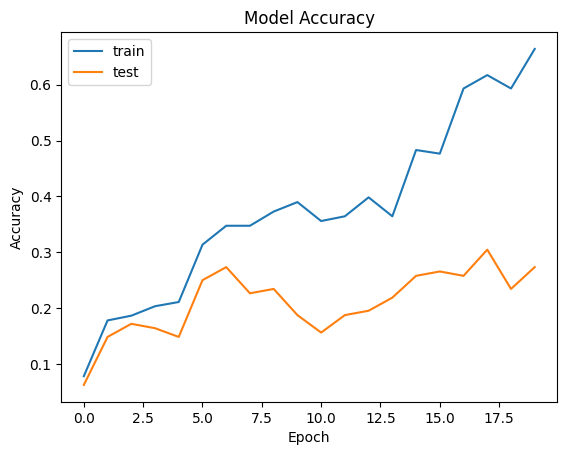

In [17]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(test, steps=test_steps_per_epoch)
print(f"Testing Loss: {loss:.4f}")
print(f"Testing Accuracy: {accuracy:.4f}")

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0